In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.colors as colors

from astropy.visualization import astropy_mpl_style
from astropy.utils.data import get_pkg_data_filename
from astropy.io import fits

import scipy.stats as stat
from scipy.optimize import curve_fit
from scipy.signal import find_peaks, peak_prominences, peak_widths
from scipy.stats import linregress

import itertools

import helperfile as hf


# I have no idea what is going here

In [2]:
# Block of Code to show FIT Image

# bins, intensities  = hf.CreateData('180NoBRun1.txt')
# bins, intensities =  np.array(bins), np.array(intensities)
# hf.Plots(bins, intensities, "B=0.384 kG, Polarize = 180 deg, Intensity Plot - Full set", 'Bins', 'Intensity [ADU] ', figsize0= 15, figsize1=4)

In [3]:
# STEP 1: Load Data 
xy = np.loadtxt('XYR1_180_Dic.txt', dtype=int, delimiter=',')
print(type(xy))
print(f"Number of trials to examine = {len(xy)/2}\nTotal Number of arrays = {len(xy)}")

<class 'numpy.ndarray'>
Number of trials to examine = 12.0
Total Number of arrays = 24


In [4]:
# # STEP 2: Check all graphs  

# hf.MakeManyPlots(xy)

Data ratio set


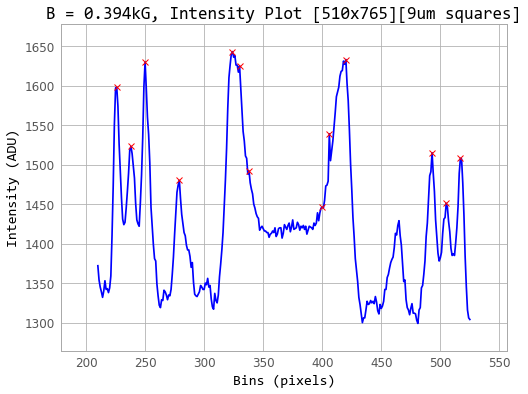

In [5]:
# STEP 5: TRUNCATE TO THE FIRST ORDER
peaks1, x_1, y_1 = hf.LabelPeaks_ShrinkData(xy[0],xy[1],210,525,1500)
peaks2, x_2, y_2 = hf.LabelPeaks_ShrinkData(xy[2],xy[3],210,525,1500)
peaks3, x_3, y_3 = hf.LabelPeaks_ShrinkData(xy[4],xy[5],210,525,1480)
peaks4, x_4, y_4 = hf.LabelPeaks_ShrinkData(xy[6],xy[7],250,525,1440)
peaks5, x_5, y_5 = hf.LabelPeaks_ShrinkData(xy[8],xy[9],250,500,1550)
peaks6, x_6, y_6 = hf.LabelPeaks_ShrinkData(xy[10],xy[11],210,525,1455)
peaks7, x_7, y_7 = hf.LabelPeaks_ShrinkData(xy[12],xy[13],210,525,1455)
peaks8, x_8, y_8 = hf.LabelPeaks_ShrinkData(xy[14],xy[15],210,525,1455)
peaks9, x_9, y_9 = hf.LabelPeaks_ShrinkData(xy[16],xy[17],210,525,1450)
peaks10, x_10, y_10 = hf.LabelPeaks_ShrinkData(xy[18],xy[19],210,525,1440)
peaks11, x_11, y_11 = hf.LabelPeaks_ShrinkData(xy[20],xy[21],210,525,1440)
peaks12, x_12, y_12 = hf.LabelPeaks_ShrinkData(xy[22],xy[23],210,525,1440)


# hf.Plots(x_1,y_1, 
#     'B = 0.404kG, Intensity Plot [510x765][9um squares]', 
#     'Bins (pixels)', 'Intensity (ADU)', 
#     # figsize0=12, figsize1=8
#     )
# hf.PlotNewPeaks(peaks1,xy[1])

# hf.Plots(x_2,y_2, 
#     'B = 0.414kG, Intensity Plot [510x765][9um squares]', 
#     'Bins (pixels)', 'Intensity (ADU)', 
#     # figsize0=12, figsize1=6
#     )
# hf.PlotNewPeaks(peaks2,xy[3])

# hf.Plots(x_3,y_3, 
#     'B = 0.424kG, Intensity Plot [510x765][9um squares]', 
#     'Bins (pixels)', 'Intensity (ADU)', 
#     # figsize0=12, figsize1=6
#     )
# hf.PlotNewPeaks(peaks3,xy[5])


# hf.Plots(x_4,y_4, 
#     'B = 0.075kG, Intensity Plot [510x765][9um squares]', 
#     'Bins (pixels)', 'Intensity (ADU)', 
#     # figsize0=12, figsize1=6
#     )
# hf.PlotNewPeaks(peaks4,xy[7])


# hf.Plots(x_5,y_5, 
#     'B = 0.192kG, Intensity Plot [510x765][9um squares]', 
#     'Bins (pixels)', 'Intensity (ADU)', 
#     # figsize0=12, figsize1=6
#     )
# hf.PlotNewPeaks(peaks5,xy[9])

# hf.Plots(x_6,y_6, 
#     'B = 0.330kG, Intensity Plot [510x765][9um squares]', 
#     'Bins (pixels)', 'Intensity (ADU)', 
#     # figsize0=12, figsize1=6
#     )
# hf.PlotNewPeaks(peaks6,xy[11])

# hf.Plots(x_7,y_7, 
#     'B = 0.342kG, Intensity Plot [510x765][9um squares]', 
#     'Bins (pixels)', 'Intensity (ADU)', 
#     # figsize0=12, figsize1=6
#     )
# hf.PlotNewPeaks(peaks7,xy[13])

# hf.Plots(x_8,y_8, 
#     'B = 0.353kG, Intensity Plot [510x765][9um squares]', 
#     'Bins (pixels)', 'Intensity (ADU)', 
#     # figsize0=12, figsize1=6
#     )
# hf.PlotNewPeaks(peaks8,xy[15])

# hf.Plots(x_9,y_9, 
#     'B = 0.362kG, Intensity Plot [510x765][9um squares]', 
#     'Bins (pixels)', 'Intensity (ADU)', 
#     # figsize0=12, figsize1=6
#     )
# hf.PlotNewPeaks(peaks9,xy[17])

# hf.Plots(x_10,y_10, 
#     'B = 0.375kG, Intensity Plot [510x765][9um squares]', 
#     'Bins (pixels)', 'Intensity (ADU)', 
#     # figsize0=12, figsize1=6
#     )
# hf.PlotNewPeaks(peaks10,xy[19])

# hf.Plots(x_11,y_11, 
#     'B = 0.384kG, Intensity Plot [510x765][9um squares]', 
#     'Bins (pixels)', 'Intensity (ADU)', 
#     # figsize0=12, figsize1=6
#     )
# hf.PlotNewPeaks(peaks11,xy[21])

hf.Plots(x_12,y_12, 
    'B = 0.394kG, Intensity Plot [510x765][9um squares]', 
    'Bins (pixels)', 'Intensity (ADU)', 
    # figsize0=12, figsize1=6
    )
hf.PlotNewPeaks(peaks12,xy[23])



In [6]:
# STEP 6: CREATE RADIUS ARRAY 
B1 = 0.404E3 #Gauss
R1_1 = hf.RadiusMeter(peaks1[0], peaks1[-1])
R1_2 = hf.RadiusMeter(peaks1[2], peaks1[-2])
# R1_3 = hf.RadiusMeter(peaks1[2], peaks1[-4])

B2 = 0.414E3
R2_1 = hf.RadiusMeter(peaks2[0], peaks2[-1])
R2_2 = hf.RadiusMeter(peaks2[2], peaks2[-2])
# R2_3 = hf.RadiusMeter(peaks2[2], peaks2[-3])

B3 = 0.424E3
R3_1 = hf.RadiusMeter(peaks3[0], peaks3[-1])
R3_2 = hf.RadiusMeter(peaks3[2], peaks3[-2])
# R3_3 = hf.RadiusMeter(peaks3[3], peaks3[-4])

B4 = 0.075E3
R4_1 = hf.RadiusMeter(peaks4[0], peaks4[-1])
R4_2 = hf.RadiusMeter(peaks4[2], peaks4[-2])
# R4_3 = hf.RadiusMeter(peaks4[3], peaks4[-4])

B5 = 0.192E3
R5_1 = hf.RadiusMeter(peaks5[0], peaks5[-1])
R5_2 = hf.RadiusMeter(peaks5[1], peaks5[-2])
# R5_3 = hf.RadiusMeter(peaks5[3], peaks5[-4])

B6 = 0.330E3
R6_1 = hf.RadiusMeter(peaks6[0], peaks6[-1])
R6_2 = hf.RadiusMeter(peaks6[1], peaks6[-2])
# R6_3 = hf.RadiusMeter(peaks6[3], peaks6[-4])

B7 = 0.342E3
R7_1 = hf.RadiusMeter(peaks7[0], peaks7[-1])
R7_2 = hf.RadiusMeter(peaks7[1], peaks7[-2])
# R7_3 = hf.RadiusMeter(peaks7[3], peaks7[-4])

B8 = 0.353E3
R8_1 = hf.RadiusMeter(peaks8[0], peaks8[-1])
R8_2 = hf.RadiusMeter(peaks8[1], peaks8[-2])
# R8_3 = hf.RadiusMeter(peaks8[3], peaks8[-4])

B9 = 0.362E3
R9_1 = hf.RadiusMeter(peaks9[0], peaks9[-1])
R9_2 = hf.RadiusMeter(peaks9[2], peaks9[-2])
# R9_3 = hf.RadiusMeter(peaks9[3], peaks9[-4])

B10 = 0.375E3
R10_1 = hf.RadiusMeter(peaks10[0], peaks10[-1])
R10_2 = hf.RadiusMeter(peaks10[2], peaks10[-2])
# R10_3 = hf.RadiusMeter(peaks10[3], peaks10[-4])

B11 = 0.384E3
R11_1 = hf.RadiusMeter(peaks11[0], peaks11[-1])
R11_2 = hf.RadiusMeter(peaks11[2], peaks11[-2])
# R11_3 = hf.RadiusMeter(peaks11[2], peaks11[-4])

B12 = 0.394E3
R12_1 = hf.RadiusMeter(peaks12[0], peaks12[-1])
R12_2 = hf.RadiusMeter(peaks12[2], peaks12[-3])
# R11_3 = hf.RadiusMeter(peaks11[2], peaks11[-4])

radii = [
    R1_1, R1_2, 
    R2_1, R2_2, 
    R3_1, R3_2, 
    R4_1, R4_2, 
    R5_1, R5_2, 
    R6_1, R6_2, 
    R7_1, R7_2, 
    R8_1, R8_2, 
    R9_1, R9_2, 
    R10_1, R10_2, 
    R11_1, R11_2, 
    R12_1, R12_2, 
]

# EACH SET OF GRAPHS WILL CONTRIBUTE 1 DELTA E
B = [
    B1,
    B2,
    B3,
    B4,
    B5,
    B6,
    B7,
    B8,
    B9,
    B10,
    B11,
    B12,
]

B = np.array(B)

In [7]:
# STEP 7: CREATE THETA ARRAYS 
thetas = hf.ThetasRadArray(radii)
#saved as txt to use in Error prop File to return Yerr 
np.savetxt("Run1Thetas180.txt", thetas, delimiter =", ")


In [8]:
# STEP 8: CREATE DELTA E ARRAYS 
delE_180 = hf.DeltaEPrime180(thetas)
print(len(delE_180))

12


In [9]:
for i in B:
    print(i)

404.0
414.0
424.0
75.0
192.0
330.0
342.0
353.0
362.0
375.0
384.0
394.0


In [10]:
# STEP 9: PLOT 

# plt.scatter(B,delE_180)


In [11]:
# STEP 10: CREATE FIT FUNCTION 
# E = A*MU_0*B - TWO UNKNOWNS
# E = 0.5*MU_0B - A KNOWN 
# E = A*MU*B - MU_0 KNOWN 

# TWO UNKNOWNS 
def DelE1(B,mu_0,a):
    mu = 9.2741E-21 # erg/G
    A = 2.5
    return a*mu_0*B

p01 = [9.3E-21, 2.3]

# A KNOWN
def DelE2(B,mu_0):
    mu = 9.2741E-21 # erg/G
    A = 2.5
    return A*mu_0*B

p02 = [9.3E-21]

# MU KNOWN
def DelE3(B,a):
    mu = 9.2741E-21 # erg/G
    A = 2.5
    return a*mu*B

p03 = [2.3]

In [12]:
# STEP 11: LOAD ERROR FROM Error90.ipynb 
# AND ASSIGN B ERROR 

sigmaE = np.loadtxt('Run1Eerr180.txt', delimiter=',')




# CREATE SAME SIZE ARRAY
Barr = np.ones(len(B))
# ERROR
sigmaB = 0.05E3 # Gauss 
Berr = sigmaB*Barr

In [13]:
# STEP 12: APPLY FIT

# TWO UNKNOWNS 
popt1, pcov1 = curve_fit( 
                    DelE1,
                    B,
                    delE_180,
                    p0= p01, 
                    absolute_sigma=True,
                    sigma=sigmaE
                    )

for i in range(0,len(popt1)):
    print('param ',i,' = ',popt1[i], '+/-', np.sqrt(pcov1[i,i]))

# A KNOWN
print('\nA = 0.5 Known, fit mu_0 : 9.2741E-21')
popt2, pcov2 = curve_fit( 
                    DelE2,
                    B,
                    delE_180,
                    p0= p02, 
                    absolute_sigma=True,
                    sigma=sigmaE
                    )

for i in range(0,len(popt2)):
    print('param ',i,' = ',popt2[i], '+/-', np.sqrt(pcov2[i,i]))

# MU KNOWN
print('\nmu_0 = 9.2741E-21, fit A : Assuming A = 1/2')
popt3, pcov3 = curve_fit( 
                    DelE3,
                    B,
                    delE_180,
                    p0= p03, 
                    absolute_sigma=True,
                    sigma=sigmaE
                    )

for i in range(0,len(popt3)):
    print('param ',i,' = ',popt3[i], '+/-', np.sqrt(pcov3[i,i]))

param  0  =  1.863333854561821e-20 +/- inf
param  1  =  8.34425274691057 +/- inf

A = 0.5 Known, fit mu_0 : 9.2741E-21
param  0  =  6.219254389899721e-20 +/- 7.02079519798526e-22

mu_0 = 9.2741E-21, fit A : Assuming A = 1/2
param  0  =  16.765115758102727 +/- 0.18925812641310275


c:\Users\mpmun\OneDrive\Documents\1Pichardo\UCSC\Spring2022\Phys134\134code\Code\.venv\lib\site-packages\scipy\optimize\_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


[1.86333385e-20 8.34425275e+00]


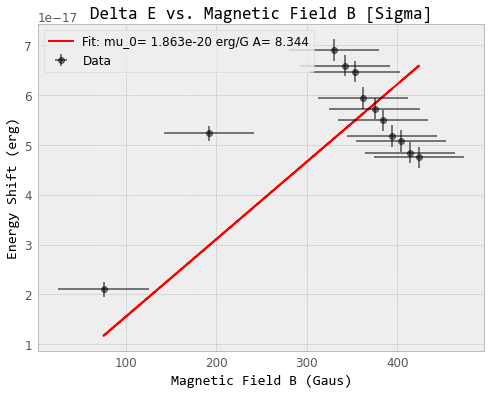

In [14]:
# PLOT1

#style
hfont = {'fontname':'Consolas'}
plt.figure()
plt.style.use('bmh')


# Better looking line
B_line = np.linspace(min(B), max(B), 1000)
fit1 = DelE1(B, *popt1)

#data
plt.plot(B, fit1, label = 'Fit: mu_0= %1.3e erg/G A= %1.3f' % tuple(popt1), color = 'red')

plt.errorbar(
    B, 
    delE_180, 
    yerr= sigmaE,
    xerr= Berr, 
    fmt='o', 
    label = 'Data', 
    color='black',
    alpha =0.5
    )

#labels
plt.title("Delta E vs. Magnetic Field B [Sigma]", **hfont)
plt.xlabel('Magnetic Field B (Gaus)', **hfont)
plt.ylabel('Energy Shift (erg)', **hfont)
plt.legend(loc=2)

print(popt1)

# hf.SaveFigure("SigmaDelEvsB90Run3_1.png")

[6.21925439e-20]


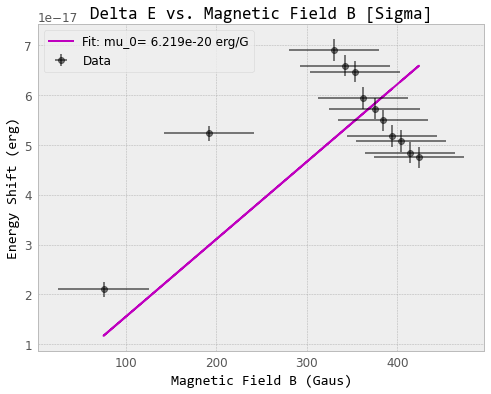

In [15]:
# PLOT2

#style
hfont = {'fontname':'Consolas'}
plt.figure()
plt.style.use('bmh')


# Better looking line
B_line = np.linspace(min(B), max(B), 1000)
fit2 = DelE2(B, *popt2)

#data
plt.plot(B, fit2, label = 'Fit: mu_0= %1.3e erg/G' % tuple(popt2), color = 'm')

plt.errorbar(
    B, 
    delE_180, 
    yerr= sigmaE,
    xerr= Berr, 
    fmt='o', 
    label = 'Data', 
    color='black',
    alpha =0.5
    )

#labels
plt.title("Delta E vs. Magnetic Field B [Sigma]", **hfont)
plt.xlabel('Magnetic Field B (Gaus)', **hfont)
plt.ylabel('Energy Shift (erg)', **hfont)
plt.legend(loc=2)

print(popt2)

# hf.SaveFigure("SigmaDelEvsB90Run3_2.png")

[16.76511576]


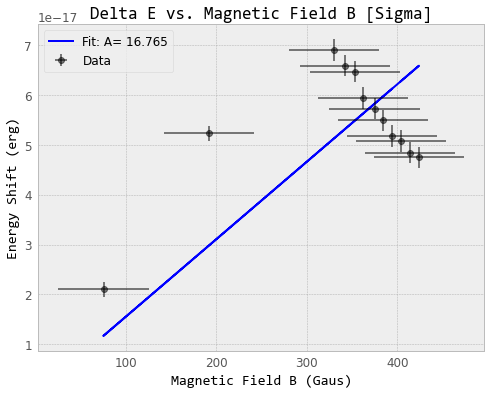

In [16]:
# PLOT3

#style
hfont = {'fontname':'Consolas'}
plt.figure()
plt.style.use('bmh')


# Better looking line
B_line = np.linspace(min(B), max(B), 1000)
fit3 = DelE3(B, *popt3)

#data
plt.plot(B, fit3, label = 'Fit: A= %1.3f' % tuple(popt3), color = 'b')

plt.errorbar(
    B, 
    delE_180, 
    yerr= sigmaE,
    xerr= Berr, 
    fmt='o', 
    label = 'Data', 
    color='black',
    alpha =0.5
    )

#labels
plt.title("Delta E vs. Magnetic Field B [Sigma]", **hfont)
plt.xlabel('Magnetic Field B (Gaus)', **hfont)
plt.ylabel('Energy Shift (erg)', **hfont)
plt.legend(loc=2)

print(popt3)

# hf.SaveFigure("SigmaDelEvsB90Run3_3.png")

In [17]:
# Try Fixing by removing 
x = np.delete(B,3)
x = np.delete(x,3)
print(len(x))
print(x)
y = np.delete(delE_180,3)
y = np.delete(y,3)
print(len(y))
print(y)

10
[404. 414. 424. 330. 342. 353. 362. 375. 384. 394.]
10
[5.08154103e-17 4.84712135e-17 4.74829777e-17 6.90660942e-17
 6.59518786e-17 6.47494752e-17 5.94648239e-17 5.73024713e-17
 5.49340303e-17 5.17996050e-17]


In [18]:
sigmaE = np.delete(sigmaE,3)
sigmaE = np.delete(sigmaE,3)
Berr = np.delete(Berr,3)
Berr = np.delete(Berr,3)

In [19]:
# STEP 12: APPLY FIT

# TWO UNKNOWNS 
popt1, pcov1 = curve_fit( 
                    DelE1,
                    x,
                    y,
                    p0= p01, 
                    absolute_sigma=True,
                    sigma=sigmaE
                    )

for i in range(0,len(popt1)):
    print('param ',i,' = ',popt1[i], '+/-', np.sqrt(pcov1[i,i]))

# A KNOWN
print('\nA = 0.5 Known, fit mu_0 : 9.2741E-21')
popt2, pcov2 = curve_fit( 
                    DelE2,
                    x,
                    y,
                    p0= p02, 
                    absolute_sigma=True,
                    sigma=sigmaE
                    )

for i in range(0,len(popt2)):
    print('param ',i,' = ',popt2[i], '+/-', np.sqrt(pcov2[i,i]))

# MU KNOWN
print('\nmu_0 = 9.2741E-21, fit A : Assuming A = 1/2')
popt3, pcov3 = curve_fit( 
                    DelE3,
                    x,
                    y,
                    p0= p03, 
                    absolute_sigma=True,
                    sigma=sigmaE
                    )

for i in range(0,len(popt3)):
    print('param ',i,' = ',popt3[i], '+/-', np.sqrt(pcov3[i,i]))

param  0  =  1.8741983575444768e-20 +/- inf
param  1  =  7.907874087738368 +/- inf

A = 0.5 Known, fit mu_0 : 9.2741E-21
param  0  =  5.92837825243287e-20 +/- 7.233288515850003e-22

mu_0 = 9.2741E-21, fit A : Assuming A = 1/2
param  0  =  15.981006942711847 +/- 0.19498626476658654


c:\Users\mpmun\OneDrive\Documents\1Pichardo\UCSC\Spring2022\Phys134\134code\Code\.venv\lib\site-packages\scipy\optimize\_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


[1.87419836e-20 7.90787409e+00]


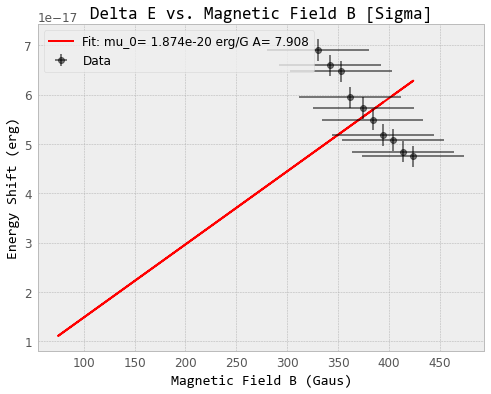

In [20]:
# PLOT1

#style
hfont = {'fontname':'Consolas'}
plt.figure()
plt.style.use('bmh')


# Better looking line
B_line = np.linspace(min(B), max(B), 1000)
fit1 = DelE1(B, *popt1)

#data
plt.plot(B, fit1, label = 'Fit: mu_0= %1.3e erg/G A= %1.3f' % tuple(popt1), color = 'red')

plt.errorbar(
    x, 
    y, 
    yerr= sigmaE,
    xerr= Berr, 
    fmt='o', 
    label = 'Data', 
    color='black',
    alpha =0.5
    )

#labels
plt.title("Delta E vs. Magnetic Field B [Sigma]", **hfont)
plt.xlabel('Magnetic Field B (Gaus)', **hfont)
plt.ylabel('Energy Shift (erg)', **hfont)
plt.legend(loc=2)

print(popt1)

# hf.SaveFigure("SigmaDelEvsB90Run3_1.png")

In [21]:
# Try  a larger set of values---- This does not work becuse the values are so spead out 